## **Diabetes Prediction – Machine Learning Model Development**

#### This notebook builds, evaluates, and compares multiple machine learning models to predict diabetes using clinical and demographic data.

**1. Import Required Libraries**

##### This section imports all libraries needed for data processing, model training, evaluation, visualization, and interpretation.

In [23]:
# Importing necessary libraries
import pandas as pd   # Data manipulation
import seaborn as sns # Statistical visualization
import matplotlib.pyplot as plt # Plotting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.calibration import calibration_curve

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


**2.  Dataset Upload and Loading**

##### This section uploads the dataset using Google Colab and loads it into a pandas DataFrame.

In [24]:
# Upload the dataset using Google Colab file upload widget

# Now that the file is uploaded, load it into a pandas DataFrame
file_name = '../data/processed/diabetes_prediction_dataset.csv'  # Go up one level from notebooks folder
dataset = pd.read_csv(file_name)

print("Dataset loaded successfully from local file!")
print(f" Dataset shape: {dataset.shape}")

# Display the first few rows of the dataset
dataset.head()


Dataset loaded successfully from local file!
 Dataset shape: (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**3. Data Preprocessing**

##### This section prepares the dataset for modeling by encoding categorical variables, handling missing values, and scaling features.

In [25]:
# Encoding categorical variables
label_encoder = LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])
dataset['smoking_history'] = label_encoder.fit_transform(dataset['smoking_history'])


In [26]:
# Check for missing values and handle them (mean imputation for simplicity)
dataset.fillna(dataset.mean(), inplace=True)

In [27]:
# Separating features and target variable
X = dataset.drop(columns=['diabetes'])  # Features
y = dataset['diabetes']  # Target variable

In [28]:
# Normalizing the numeric columns (age, bmi, HbA1c_level, blood_glucose_level)
scaler = StandardScaler()
X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [29]:
# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(" Data preprocessing completed!")


 Data preprocessing completed!


**4. Model Training**

##### This section trains three machine learning models such as Logistic Regression, Random Forest, and XGBoost.

In [30]:
# Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [31]:
# Random Forest Model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [32]:
# XGBoost Model
model_xgb = XGBClassifier(eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print("Model training completed!")

Model training completed!


**5.Model Evaluation Metrics**

##### This section evaluates each model using accuracy, precision, recall, and F1-score.

In [33]:
# Logistic Regression
print(" Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

# Random Forest
print("\nRandom Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# XGBoost
print("\n XGBoost Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

 Logistic Regression Performance
Accuracy: 0.9590333333333333
Precision: 0.8648947951273532
Recall: 0.613270514330585
F1 Score: 0.7176659774867907

Random Forest Performance
Accuracy: 0.9706666666666667
Precision: 0.9592286501377411
Recall: 0.6835492736552807
F1 Score: 0.7982576799633195

 XGBoost Performance
Accuracy: 0.9706666666666667
Precision: 0.9557135046473483
Recall: 0.6862976050255202
F1 Score: 0.7989031078610603


**6. Model Performance Comparison Table**

##### This section summarizes all model performance metrics into a single comparison table.

In [34]:
models = {
    "Logistic Regression": model_lr,
    "Random Forest": model_rf,
    "XGBoost": model_xgb
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Probabilities for AUC

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1": round(f1_score(y_test, y_pred), 4),
        "AUC": round(roc_auc_score(y_test, y_prob), 4)
    })

performance_table = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC"]
)

performance_table



,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.9590,0.8649,0.6133,0.7177,0.9613
1,Random Forest,0.9707,0.9592,0.6835,0.7983,0.9637
2,XGBoost,0.9707,0.9557,0.6863,0.7989,0.9779


**7. Cross-Validation**

##### This section applies 5-fold cross-validation to assess model stability and generalization performance.

In [35]:
# Cross-validation for all three models
cv_scores_lr = cross_val_score(model_lr, X, y, cv=5)
cv_scores_rf = cross_val_score(model_rf, X, y, cv=5)
cv_scores_xgb = cross_val_score(model_xgb, X, y, cv=5)

print(" Cross-Validation Results")
print(f"\nLogistic Regression Cross-validation scores: {cv_scores_lr}")
print(f"Random Forest Cross-validation scores: {cv_scores_rf}")
print(f"XGBoost Cross-validation scores: {cv_scores_xgb}")

# mean and std
print("\n Mean ± Standard Deviation")
print(f"Logistic Regression: {cv_scores_lr.mean():.2f} ± {cv_scores_lr.std():.4f}")
print(f"Random Forest: {cv_scores_rf.mean():.2f} ± {cv_scores_rf.std():.4f}")
print(f"XGBoost: {cv_scores_xgb.mean():.2f} ± {cv_scores_xgb.std():.4f}")


 Cross-Validation Results

Logistic Regression Cross-validation scores: [0.96105 0.96065 0.9601  0.9597  0.9597 ]
Random Forest Cross-validation scores: [0.97035 0.97095 0.96795 0.9708  0.97045]
XGBoost Cross-validation scores: [0.9716  0.97195 0.9691  0.9724  0.9715 ]

 Mean ± Standard Deviation
Logistic Regression: 0.96 ± 0.0005
Random Forest: 0.97 ± 0.0011
XGBoost: 0.97 ± 0.0011


**8. ROC Curve Analysis**

##### This section compares model discrimination ability using Receiver Operating Characteristic (ROC) curves.

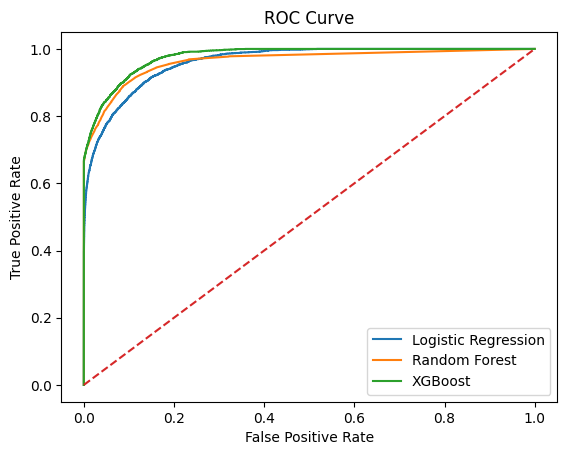

In [36]:
plt.figure()

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**9.Confusion Matrix Analysis**

##### This section visualizes classification errors using confusion matrices for each model.

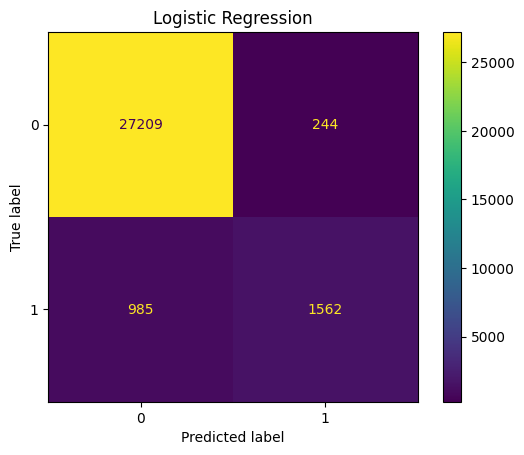

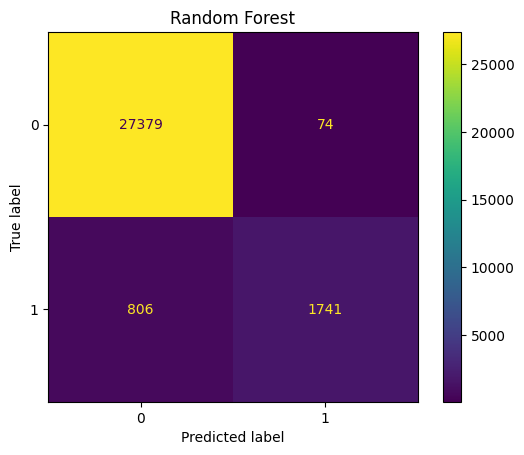

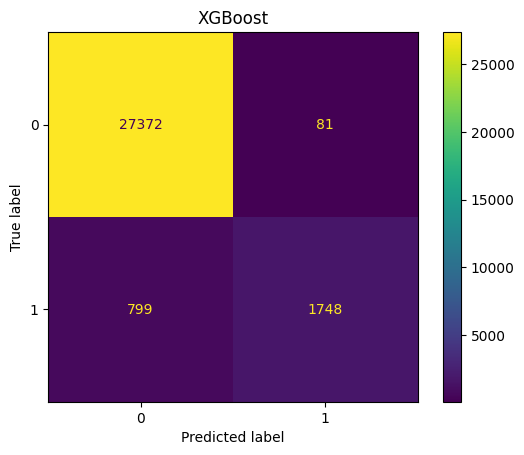

In [37]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(name)
    plt.show()

**10. Feature Importance Analysis**

##### This cell identifies which features contribute most to diabetes prediction for each model.

In [38]:
# Logistic Regression coefficients
model_lr.fit(X_train, y_train)

log_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model_lr.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

log_importance

,Feature,Coefficient
6,HbA1c_level,2.515065
7,blood_glucose_level,1.366840
1,age,1.037473
2,hypertension,0.736774
3,heart_disease,0.713920
5,bmi,0.582589
0,gender,0.259066
4,smoking_history,0.094242


In [39]:
# Random Forest importance
model_rf.fit(X_train, y_train)

rf_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

rf_importance

,Feature,Importance
6,HbA1c_level,0.382405
7,blood_glucose_level,0.333835
5,bmi,0.120365
1,age,0.102886
4,smoking_history,0.028092
2,hypertension,0.015352
3,heart_disease,0.010009
0,gender,0.007055


In [40]:
# XGBoost importance
model_xgb.fit(X_train, y_train)

xgb_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model_xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

xgb_importance

,Feature,Importance
6,HbA1c_level,0.567872
7,blood_glucose_level,0.285436
2,hypertension,0.038125
3,heart_disease,0.034915
1,age,0.029955
5,bmi,0.017414
4,smoking_history,0.014448
0,gender,0.011834


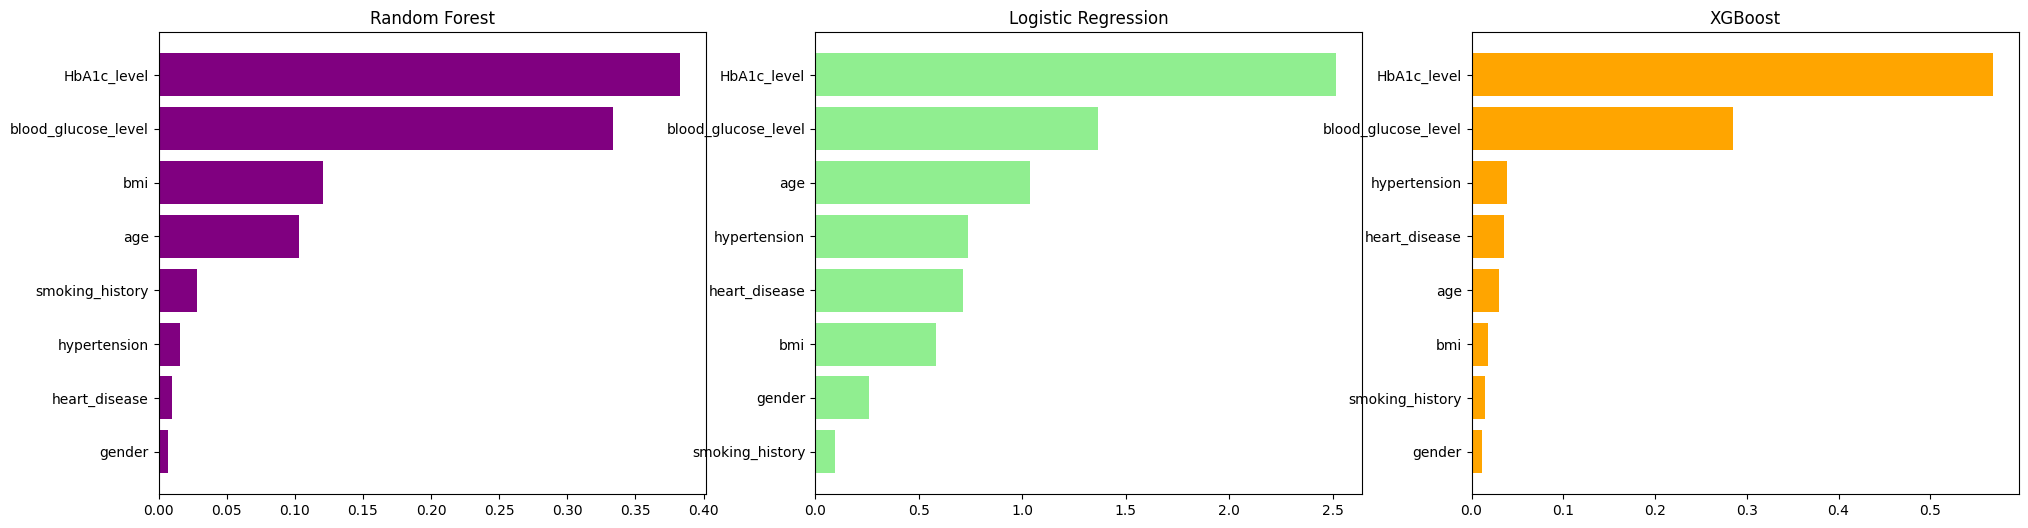

In [41]:
# Feature Importance Visualization
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

axes[0].barh(rf_importance["Feature"], rf_importance["Importance"], color='purple')
axes[0].set_title("Random Forest")

axes[1].barh(log_importance["Feature"], log_importance["Coefficient"], color='lightgreen')
axes[1].set_title("Logistic Regression")

axes[2].barh(xgb_importance["Feature"], xgb_importance["Importance"], color='orange')
axes[2].set_title("XGBoost")

for ax in axes:
    ax.invert_yaxis()

plt.show()


**12.🔗 Correlation Analysis**

##### This cell examines relationships between features to identify potential multicollinearity.

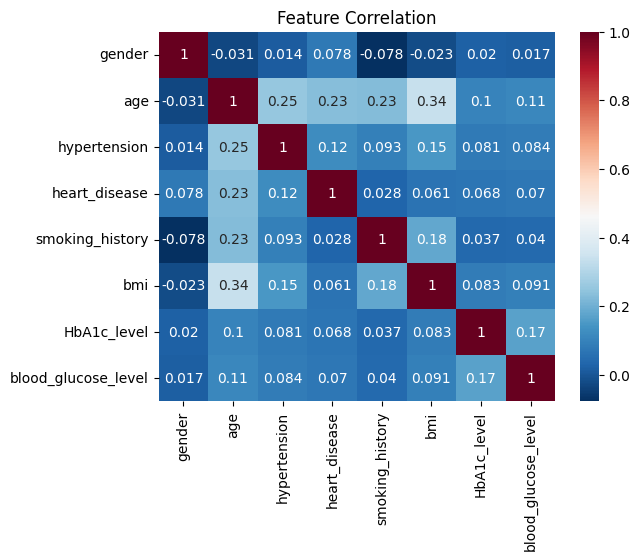

In [42]:
sns.heatmap(X.corr(), annot=True, cmap="RdBu_r")
plt.title("Feature Correlation")
plt.show()

**13. Calibration Plot**

##### This cell evaluates how well predicted probabilities align with actual diabetes outcomes.

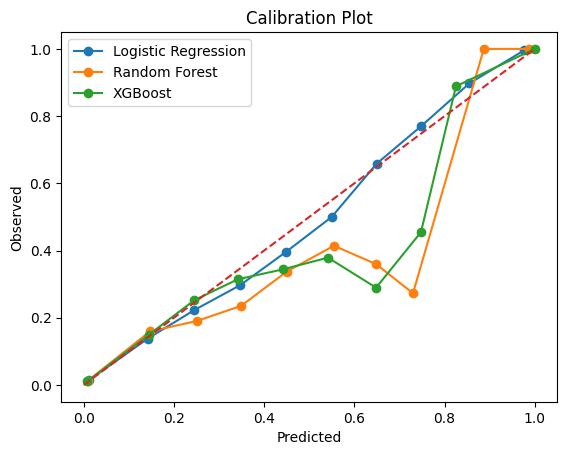

In [43]:
plt.figure()

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)

plt.plot([0,1], [0,1], '--')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("Calibration Plot")
plt.legend()
plt.show()

##  Key Findings from EDA

###  Dataset Overview

* Health indicators for diabetes prediction
* Demographic and clinical variables included
* Glucose, HbA1c, BMI, blood pressure, age
* Binary target: diabetes vs. non-diabetes
* Suitable for supervised ML classification

---

###  Data Quality

* No explicit missing values
* Zero values in medical variables detected
* Zeros likely represent missing data
* Requires preprocessing before modeling
---

###  Target Variable

* Binary outcome variable
* Slight class imbalance present
* Non-diabetic cases dominate
* Accuracy alone misleading
* Recall and F1-score are critical

---

###  Feature Relationships

* HbA1c strongly linked to diabetes
* Blood glucose highly predictive
* Age and BMI moderately correlated
* No severe multicollinearity detected
* Supports model stability

---

### Feature Characteristics

* Skewed distributions observed
* Outliers in glucose and HbA1c
* Different feature scales present
* Normalization required
* Reflects real clinical variation

---

##  Recommendations

### Data Preprocessing

* Replace zero values appropriately
* Handle outliers carefully
* Apply feature scaling
* Preserve clinical meaning

---

###  Feature Engineering

* Combine related health variables
* Enhance model interpretability

---

###  Model Development

* Start with Logistic Regression
* Apply Random Forest
* Use XGBoost for optimization
* Handle non-linear relationships

---

###  Model Evaluation

* Use precision and recall
* Report F1-score and ROC-AUC
* Apply cross-validation
* Compare model stability

---

###  Model Interpretation

* Analyze feature importance
* Prefer interpretable outputs
* Support clinical decision-making
* Align with healthcare practice

